#**Importing Libraries**

In [ ]:
#linear regression
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# deep learning
import matplotlib.pyplot as plt
import os,csv
from sklearn.metrics import confusion_matrix
%matplotlib inline
from keras.utils import np_utils
from keras import regularizers
from keras.models import Sequential,load_model
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.layers import Dense, Dropout

# **Load Data to Dataframe**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/STUDENT_MARK_PREDICTION2/student-mat.csv',delimiter=',')

In [ ]:
Student_Math_Data=data[['failures','sex','Medu','Fedu',"Fjob","Mjob",'G1','G2','G3']]

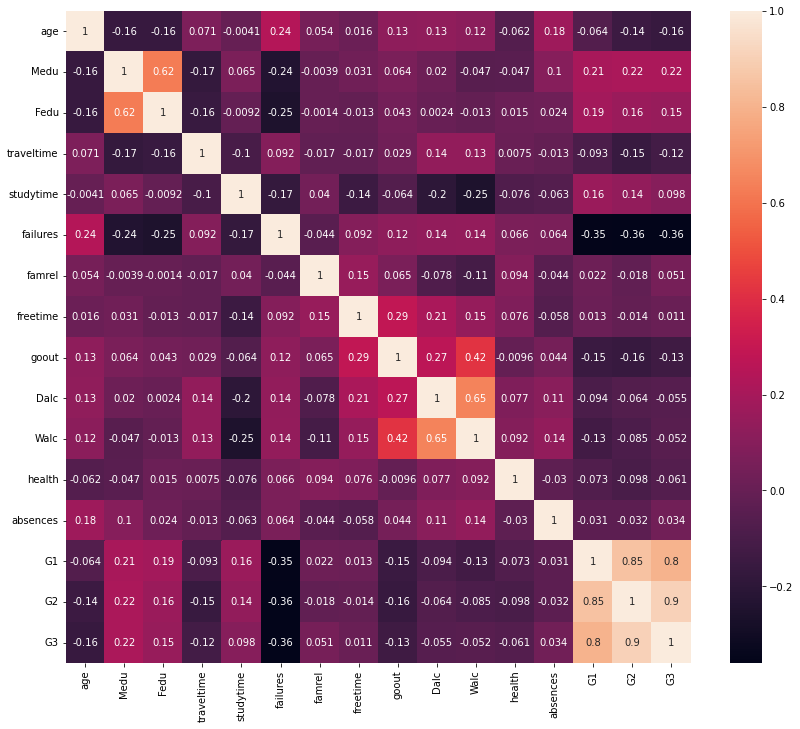

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df1=data[['failures','sex','Medu','Fedu',"Fjob","Mjob",'G1','G2','G3']]

In [ ]:
nonnumeric_columns = [df1.columns[index] for index, dtype in enumerate(df1.dtypes) if dtype == 'object']


In [ ]:
df1

,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3
0,0,F,4,4,teacher,at_home,5,6,6
1,0,F,1,1,other,at_home,5,5,6
2,3,F,1,1,other,at_home,7,8,10
3,0,F,4,2,services,health,15,14,15
4,0,F,3,3,other,other,6,10,10
...,...,...,...,...,...,...,...,...,...
390,2,M,2,2,services,services,9,9,9
391,0,M,3,1,services,services,14,16,16
392,3,M,1,1,other,other,10,8,7
393,0,M,3,2,other,services,11,12,10


In [ ]:
df1.dtypes

failures     int64
sex         object
Medu         int64
Fedu         int64
Fjob        object
Mjob        object
G1           int64
G2           int64
G3           int64
dtype: object

In [ ]:
for column in nonnumeric_columns:
    print(f"{column}: {df1[column].unique()}")

sex: ['F' 'M']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']


In [ ]:
df1['Mjob'] = df1['Mjob'].apply(lambda x: "m_" + x)
df1['Fjob'] = df1['Fjob'].apply(lambda x: "f_" + x)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3
0,0,F,4,4,f_teacher,m_at_home,5,6,6
1,0,F,1,1,f_other,m_at_home,5,5,6
2,3,F,1,1,f_other,m_at_home,7,8,10
3,0,F,4,2,f_services,m_health,15,14,15
4,0,F,3,3,f_other,m_other,6,10,10
...,...,...,...,...,...,...,...,...,...
390,2,M,2,2,f_services,m_services,9,9,9
391,0,M,3,1,f_services,m_services,14,16,16
392,3,M,1,1,f_other,m_other,10,8,7
393,0,M,3,2,f_other,m_services,11,12,10


In [ ]:
dummies = pd.concat([pd.get_dummies(df1['Mjob']),
                     pd.get_dummies(df1['Fjob'])],
                     axis=1)
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher
0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,1,0,0,0,0,1,0
391,0,0,0,1,0,0,0,0,1,0
392,0,0,1,0,0,0,0,1,0,0
393,0,0,0,1,0,0,0,1,0,0


In [ ]:
df1 = pd.concat([df1, dummies], axis=1)

df1.drop(['Mjob', 'Fjob'], axis=1, inplace=True)

In [ ]:
nonnumeric_columns = [df1.columns[index] for index, dtype in enumerate(df1.dtypes) if dtype == 'object']


In [ ]:
encoder = LabelEncoder()

for column in nonnumeric_columns:
    df1[column] = encoder.fit_transform(df1[column])

In [ ]:
y = df1['G3']
X = df1.drop('G3', axis=1)

In [ ]:
X

,failures,sex,Medu,Fedu,G1,G2,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher
0,0,0,4,4,5,6,1,0,0,0,0,0,0,0,0,1
1,0,0,1,1,5,5,1,0,0,0,0,0,0,1,0,0
2,3,0,1,1,7,8,1,0,0,0,0,0,0,1,0,0
3,0,0,4,2,15,14,0,1,0,0,0,0,0,0,1,0
4,0,0,3,3,6,10,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,1,2,2,9,9,0,0,0,1,0,0,0,0,1,0
391,0,1,3,1,14,16,0,0,0,1,0,0,0,0,1,0
392,3,1,1,1,10,8,0,0,1,0,0,0,0,1,0,0
393,0,1,3,2,11,12,0,0,0,1,0,0,0,1,0,0


In [ ]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [ ]:
X_train

,failures,sex,Medu,Fedu,G1,G2,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher
318,-0.449944,-0.948176,0.229234,1.360371,0.027493,0.076150,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.23094,-0.218507,-1.104129,1.599549,-0.281487
355,-0.449944,-0.948176,0.229234,0.440257,-0.274167,-0.456226,-0.419041,-0.306892,-0.745062,1.683731,-0.414858,-0.23094,-0.218507,-1.104129,1.599549,-0.281487
100,-0.449944,1.054656,1.143856,1.360371,-1.179147,-0.988603,-0.419041,-0.306892,-0.745062,1.683731,-0.414858,-0.23094,-0.218507,-1.104129,1.599549,-0.281487
23,-0.449944,1.054656,-0.685387,-0.479857,0.630813,0.608526,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.23094,-0.218507,0.905691,-0.625176,-0.281487
168,-0.449944,-0.948176,-0.685387,-0.479857,-1.480807,-0.988603,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.23094,-0.218507,0.905691,-0.625176,-0.281487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.449944,-0.948176,0.229234,-0.479857,1.535793,1.140903,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.23094,-0.218507,0.905691,-0.625176,-0.281487
61,-0.449944,-0.948176,-1.600009,-1.399970,-0.274167,-0.722415,-0.419041,-0.306892,-0.745062,1.683731,-0.414858,-0.23094,-0.218507,-1.104129,1.599549,-0.281487
209,-0.449944,-0.948176,1.143856,0.440257,-1.179147,-0.988603,-0.419041,-0.306892,-0.745062,-0.593919,2.410466,-0.23094,-0.218507,0.905691,-0.625176,-0.281487
178,-0.449944,1.054656,1.143856,-0.479857,-0.274167,-0.722415,-0.419041,-0.306892,-0.745062,-0.593919,2.410466,-0.23094,-0.218507,-1.104129,1.599549,-0.281487


#**Lasso Regresser**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model=Lasso()
model.fit(X_train,y_train)
print(model.score(X_test,y_test)*100)

81.29521978522165


#**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
print(model.score(X_test,y_test)*100)

70.06241992640724


#**Linear regression**

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test)*100)

84.57923942005034


In [ ]:
pred=reg.predict(X_test)
pred

array([ 8.14419852, -0.57113351, 10.0665618 , 14.94693289,  6.31509696,
       11.5509368 , 11.11148367, 12.76529227, 10.89517508,  8.67349539,
        8.71402274,  8.63882742,  4.03775321,  7.48257742,  8.86490164,
        3.44107352, 12.66519461, 10.5821868 , 12.35611258,  9.45035086,
        8.29458914, 12.19400321, 18.59732352,  9.5196868 , 15.22671805,
       13.65982352,  8.86831961,  8.58951102,  7.96402274, 16.21060477,
       13.43570242,  0.4415618 ,  8.35367117, 13.41617117,  6.3243743 ,
       17.69742117, 12.10367117,  7.64078055,  8.60367117, 18.70132742,
        9.59390555, 10.57095633, 10.81314383,  6.76333914,  9.68570242,
       16.23111258, -0.44271554,  4.61783133,  7.71109305,  9.49966727,
       15.41861258,  6.71206961, 13.02505789,  7.11294852, 14.38394461,
       15.66372977,  5.1993743 ,  6.93570242, 14.59341727, 14.08169852,
       11.68521414, 19.72574149, 10.97427664,  7.64078055, 14.24331961,
       10.02896414,  3.15298758,  9.05826102,  8.88150321,  9.68

In [ ]:
predd=np.array([0,1,3,2,12,13,0,0,0,0,1,0,0,0,0,1]).reshape(1,-1)
reg.predict(predd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-2.34338104e+13])

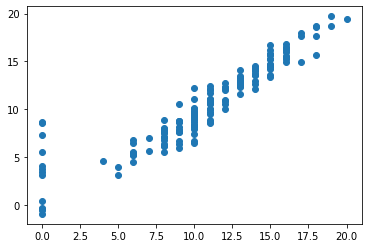

In [ ]:
plt.scatter(y_test,pred)

#**Data analysis**

In [ ]:
#deep learning
data=pd.read_csv('/content/drive/MyDrive/STUDENT_MARK_PREDICTION2/student-mat.csv',delimiter=',')
Student_Math_Data=data[['failures','sex','Medu','Fedu',"Fjob","Mjob",'G1','G2','G3']]

In [ ]:
Student_Math_Data.head(10)

,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3
0,0,F,4,4,teacher,at_home,5,6,6
1,0,F,1,1,other,at_home,5,5,6
2,3,F,1,1,other,at_home,7,8,10
3,0,F,4,2,services,health,15,14,15
4,0,F,3,3,other,other,6,10,10
5,0,M,4,3,other,services,15,15,15
6,0,M,2,2,other,other,12,12,11
7,0,F,4,4,teacher,other,6,5,6
8,0,M,3,2,other,services,16,18,19
9,0,M,3,4,other,other,14,15,15


In [ ]:
Student_Math_Data.describe()

,failures,Medu,Fedu,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.334177,2.749367,2.521519,10.908861,10.713924,10.415190
std,0.743651,1.094735,1.088201,3.319195,3.761505,4.581443
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,8.000000,9.000000,8.000000
50%,0.000000,3.000000,2.000000,11.000000,11.000000,11.000000
75%,0.000000,4.000000,3.000000,13.000000,13.000000,14.000000
max,3.000000,4.000000,4.000000,19.000000,19.000000,20.000000


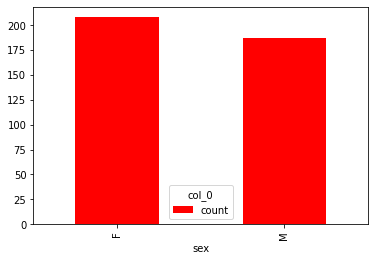

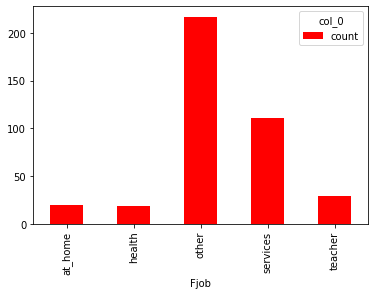

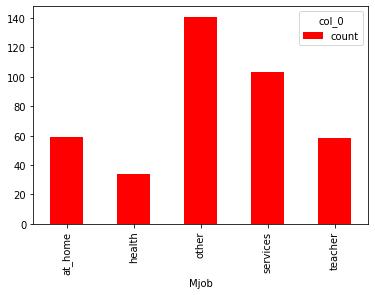

In [ ]:
#Bar Plots for categorical Variables
my_colors = ['r','g','y','b']
for i in Student_Math_Data.select_dtypes(['object']).columns:
    my_tab = pd.crosstab(index = Student_Math_Data[i], columns="count")     
    my_tab.plot.bar(color=my_colors)

In [ ]:
#Calculate the correlation in order to know which variables are most related
correlation = Student_Math_Data.corr()
correlation_sorted = correlation.abs().unstack()
correlation_sorted.sort_values(ascending = False)

failures  failures    1.000000
Medu      Medu        1.000000
G2        G2          1.000000
G1        G1          1.000000
Fedu      Fedu        1.000000
G3        G3          1.000000
          G2          0.904868
G2        G3          0.904868
          G1          0.852118
G1        G2          0.852118
G3        G1          0.801468
G1        G3          0.801468
Medu      Fedu        0.623455
Fedu      Medu        0.623455
failures  G3          0.360415
G3        failures    0.360415
failures  G2          0.355896
G2        failures    0.355896
failures  G1          0.354718
G1        failures    0.354718
failures  Fedu        0.250408
Fedu      failures    0.250408
failures  Medu        0.236680
Medu      failures    0.236680
          G3          0.217147
G3        Medu        0.217147
G2        Medu        0.215527
Medu      G2          0.215527
G1        Medu        0.205341
Medu      G1          0.205341
G1        Fedu        0.190270
Fedu      G1          0.190270
        

In [ ]:
#As instructed in the paper, convert G3 to 5 grade classes A,B,C,D,F
grade = []
for i in Student_Math_Data['G3'].values:
    if i in range(0,10):
        grade.append('F')
    elif i in range(10,12):
        grade.append('D')
    elif i in range(12,14):
        grade.append('C')
    elif i in range(14,16):
        grade.append('B')
    else:
        grade.append("A")

Student_Math_Data_Copy = Student_Math_Data
se = pd.Series(grade)
Student_Math_Data_Copy['Grade'] = se.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Verfify if the mapping is correct
Student_Math_Data_Copy.head(2)


,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3,Grade
0,0,F,4,4,teacher,at_home,5,6,6,F
1,0,F,1,1,other,at_home,5,5,6,F


# **DataCleaning**

In [ ]:
# check for any non unique columns
Student_Math_Data_Copy.apply(pd.Series.nunique)

failures     4
sex          2
Medu         5
Fedu         5
Fjob         5
Mjob         5
G1          17
G2          17
G3          18
Grade        5
dtype: int64

In [ ]:
#Check if any columns has NaN's
Student_Math_Data.isnull().sum()

failures    0
sex         0
Medu        0
Fedu        0
Fjob        0
Mjob        0
G1          0
G2          0
G3          0
Grade       0
dtype: int64

In [ ]:
#Now drop G3 column
student_Math_Data_without_G3 =  Student_Math_Data_Copy.drop(['G3'], axis=1)

In [ ]:
#Create data frames for input and output variables
Y = student_Math_Data_without_G3.filter(["Grade"],axis=1)
X = student_Math_Data_without_G3.drop(['Grade'],axis=1)
#split the datasets into train and test
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.15)

In [ ]:
#Perform one hot encoding
x_train = pd.get_dummies(xTrain)
x_test = pd.get_dummies(xTest)
y_train  = pd.get_dummies(yTrain)
y_test  = pd.get_dummies(yTest)

In [ ]:
x_train

,failures,Medu,Fedu,G1,G2,sex_F,sex_M,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
300,0,4,4,12,10,1,0,0,0,1,0,0,0,1,0,0,0
366,0,4,4,13,13,0,1,0,0,0,1,0,0,0,0,0,1
302,0,4,2,15,12,1,0,0,0,1,0,0,0,0,1,0,0
345,0,3,2,13,13,1,0,0,0,0,1,0,0,0,1,0,0
203,0,2,2,7,6,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,1,1,9,9,1,0,0,0,1,0,0,1,0,0,0,0
284,0,2,2,10,9,1,0,0,0,1,0,0,0,0,1,0,0
94,0,2,2,11,13,0,1,0,1,0,0,0,0,0,0,1,0
228,0,2,1,10,8,0,1,0,0,1,0,0,1,0,0,0,0


# **MultiClass Classification**

In [ ]:
#After multiple attempts, I was able to achieve best model with below configuration.
model = Sequential()
model.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001),input_shape = (17,)))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(5,  kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history  = model.fit(x_train,y_train, epochs = 200, batch_size = 5, validation_data = (x_test,y_test))
model.save('UCI_model_A.h5')


Epoch 1/200
67/67 [==============================] - 2s 9ms/step - loss: 1.7380 - accuracy: 0.2507 - val_loss: 1.5279 - val_accuracy: 0.4667
Epoch 2/200
67/67 [==============================] - 0s 5ms/step - loss: 1.4941 - accuracy: 0.4239 - val_loss: 1.3582 - val_accuracy: 0.5667
Epoch 3/200
67/67 [==============================] - 0s 5ms/step - loss: 1.2974 - accuracy: 0.4806 - val_loss: 1.2382 - val_accuracy: 0.3833
Epoch 4/200
67/67 [==============================] - 0s 4ms/step - loss: 1.1677 - accuracy: 0.5522 - val_loss: 1.0552 - val_accuracy: 0.6500
Epoch 5/200
67/67 [==============================] - 0s 6ms/step - loss: 1.0971 - accuracy: 0.5284 - val_loss: 1.0063 - val_accuracy: 0.6333
Epoch 6/200
67/67 [==============================] - 0s 5ms/step - loss: 1.0067 - accuracy: 0.6000 - val_loss: 0.9507 - val_accuracy: 0.6833
Epoch 7/200
67/67 [==============================] - 0s 5ms/step - loss: 0.9390 - accuracy: 0.6149 - val_loss: 0.9787 - val_accuracy: 0.5667
Epoch 8/200
6

In [ ]:
#Load the saved model and predict the accuracy
model_1 = load_model('UCI_model_A.h5')
model_1.summary()
results = model_1.evaluate(x_test,y_test)
print("Accuracy of the Model %.2f%%" % ( results[1]*100))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1152      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 5)                 165       
                                                                 
Total params: 7,557
Trainable params: 7,557
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 10ms/step - loss: 1.6175 - accuracy: 0.6333
Accuracy of the Model 63.33%


In [ ]:
x_test

,failures,Medu,Fedu,G1,G2,sex_F,sex_M,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
278,1,4,4,9,8,1,0,0,1,0,0,0,0,1,0,0,0
273,0,1,2,15,14,0,1,1,0,0,0,0,1,0,0,0,0
184,0,3,2,12,13,1,0,0,0,1,0,0,0,0,1,0,0
49,1,4,4,7,7,1,0,0,0,0,0,1,0,0,0,1,0
339,0,3,2,9,10,1,0,0,0,1,0,0,0,0,1,0,0
326,0,3,3,14,15,0,1,0,0,0,1,0,0,0,1,0,0
61,0,1,1,10,8,1,0,0,0,0,1,0,0,0,0,1,0
133,0,3,4,12,11,1,0,0,0,1,0,0,0,0,0,1,0
256,0,4,2,14,12,1,0,0,0,0,1,0,0,0,0,0,1
303,0,3,2,17,17,1,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#Code for visualizing confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Predict Y values
y_predicted = model_1.predict(x_test)

#Convert y_test dataframe to letter grades
test_Y = []
for i in y_test.values:
    if i[4].round() ==1:
        test_Y.append('F')
    elif i[3].round() ==1:
        test_Y.append('D')
    elif i[2].round() == 1:
        test_Y.append('C')
    elif i[1].round() ==1:
        test_Y.append('B')
    elif i[0].round() ==1:
        test_Y.append('A')
 
#convert y_predicted dataframe to letter grades
predicted_Y1 = []

for i in y_predicted:
    if i[4].round() == 1:
        predicted_Y1.append('F')
    elif i[3].round() ==1:
        predicted_Y1.append('D')
    elif i[2].round() == 1:
        predicted_Y1.append('C')
    elif i[1].round() ==1:
        predicted_Y1.append('B')
    else:
        predicted_Y1.append('A')


2/2 [==============================] - 0s 6ms/step


Confusion matrix
[[ 3  0  0  0  0]
 [ 6  3  0  0  0]
 [ 0  6  4  1  0]
 [ 0  0  3 12  3]
 [ 0  0  0  3 16]]


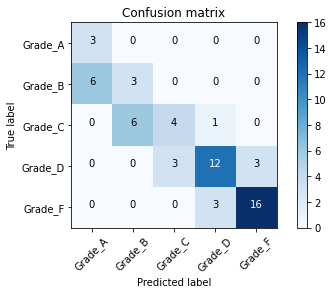

In [ ]:
names = ["Grade_A", "Grade_B", "Grade_C","Grade_D","Grade_F"]
cm = confusion_matrix(test_Y, predicted_Y1,labels=["A", "B", "C","D","F"])
plt.figure()
plot_confusion_matrix(cm, classes=names, title='Confusion matrix')

In [ ]:
history

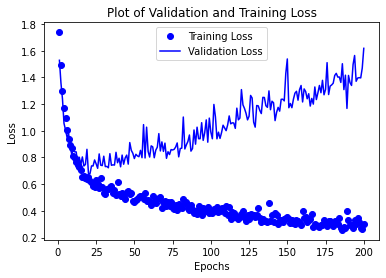

In [ ]:
#Plot training loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Plot of Validation and Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



# **Checking if dropping G2 has impact on Performance of Student**

In [ ]:
#Drop G2 to build model for Architecture B given in the Paper
student_Math_Data_without_G2 =  student_Math_Data_without_G3.drop(['G2'], axis=1)

In [ ]:
#Generate input and output dataframes
Y_G2 = student_Math_Data_without_G2.filter(["Grade"],axis=1)
X_G2 = student_Math_Data_without_G2.drop(['Grade'],axis=1)

#Split the dataframes to train and test
xTrain_G2, xTest_G2, yTrain_G2, yTest_G2 = train_test_split(X_G2, Y_G2, test_size=0.15)

In [ ]:
#Perform one hot encoding of categorical variables
x_train_G2 = pd.get_dummies(xTrain_G2)
x_test_G2 = pd.get_dummies(xTest_G2)
y_train_G2  = pd.get_dummies(yTrain_G2)
y_test_G2  = pd.get_dummies(yTest_G2)

In [ ]:
#After multiple attempts, I was able to achieve best model with below configuration.
#I have created a model with 1 input, 2 hidden and one output layer
model_G2 = Sequential()
model_G2.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001),input_shape = (16,)))
model_G2.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G2.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G2.add(Dense(5,  kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
model_G2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_G2  = model_G2.fit(x_train_G2,y_train_G2, epochs = 200, batch_size = 5, validation_data = (x_test_G2,y_test_G2))
model_G2.save('UCI_model_B.h5')

Epoch 1/200
67/67 [==============================] - 2s 10ms/step - loss: 1.8044 - accuracy: 0.2537 - val_loss: 1.5410 - val_accuracy: 0.4167
Epoch 2/200
67/67 [==============================] - 0s 6ms/step - loss: 1.5431 - accuracy: 0.3791 - val_loss: 1.4328 - val_accuracy: 0.4000
Epoch 3/200
67/67 [==============================] - 0s 3ms/step - loss: 1.4044 - accuracy: 0.3970 - val_loss: 1.3755 - val_accuracy: 0.3667
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 1.3293 - accuracy: 0.4716 - val_loss: 1.1963 - val_accuracy: 0.6333
Epoch 5/200
67/67 [==============================] - 0s 3ms/step - loss: 1.2383 - accuracy: 0.4985 - val_loss: 1.1475 - val_accuracy: 0.6333
Epoch 6/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1929 - accuracy: 0.5194 - val_loss: 1.1677 - val_accuracy: 0.4667
Epoch 7/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1879 - accuracy: 0.5224 - val_loss: 1.0740 - val_accuracy: 0.6167
Epoch 8/200


In [ ]:
model_2 = load_model('UCI_model_B.h5')
model_2.summary()
results = model_2.evaluate(x_test_G2,y_test_G2)
print("Accuracy of the Model %.2f%%" % ( results[1]*100))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                1088      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 5)                 165       
                                                                 
Total params: 7,493
Trainable params: 7,493
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 13ms/step - loss: 1.6154 - accuracy: 0.5667
Accuracy of the Model 56.67%


In [ ]:
#Predict Y values
y_predicted_G2 = model_2.predict(x_test_G2)

#Convert y_test dataframe to letter grades
test_Y_G2 = []
for i in y_test_G2.values:
    if i[4].round() ==1:
        test_Y_G2.append('F')
    elif i[3].round() ==1:
        test_Y_G2.append('D')
    elif i[2].round() == 1:
        test_Y_G2.append('C')
    elif i[1].round() ==1:
        test_Y_G2.append('B')
    elif i[0].round() ==1:
        test_Y_G2.append('A')
 
#convert y_predicted dataframe to letter grades
predicted_Y_G2 = []
for i in y_predicted_G2:
    if i[4].round() ==1:
        predicted_Y_G2.append('F')
    elif i[3].round() ==1:
        predicted_Y_G2.append('D')
    elif i[2].round() == 1:
        predicted_Y_G2.append('C')
    elif i[1].round() ==1:
        predicted_Y_G2.append('B')
    else:
        predicted_Y_G2.append('A')



2/2 [==============================] - 0s 11ms/step


Confusion matrix
[[ 2  1  0  0  0]
 [ 5  2  1  3  0]
 [ 0  0  2  6  0]
 [ 1  0  1 12  5]
 [ 1  0  0  3 15]]


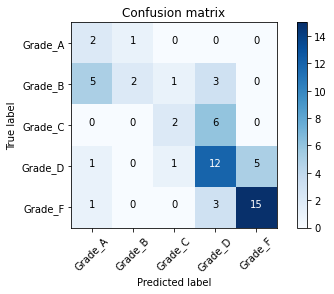

In [ ]:
#Generate Confusion Matrix and plot the same
names = ["Grade_A", "Grade_B", "Grade_C","Grade_D","Grade_F"]
cm_G2 = confusion_matrix(test_Y_G2, predicted_Y_G2,labels=["A", "B", "C","D","F"])
plt.figure()
plot_confusion_matrix(cm_G2, classes=names, title='Confusion matrix')

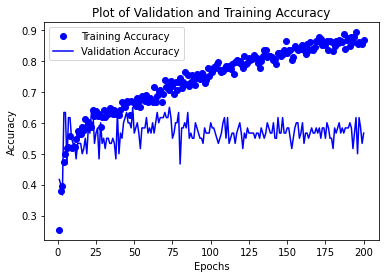

In [ ]:
#Plot training accuracy and validation accuracy
acc_G2 = history_G2.history['accuracy']
val_acc_G2 = history_G2.history['val_accuracy']
plt.plot(epochs,acc_G2,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc_G2,'b',label = 'Validation Accuracy')
plt.title('Plot of Validation and Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

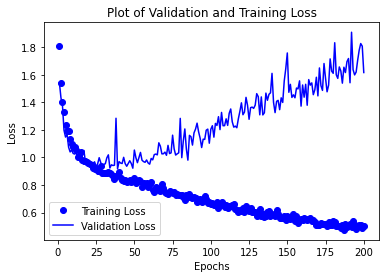

In [ ]:
#Plot training loss and validation loss
loss_G2 = history_G2.history['loss']
val_loss_G2 = history_G2.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.plot(epochs,loss_G2,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss_G2,'b',label = 'Validation Loss')
plt.title('Plot of Validation and Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



# **Checking if dropping G1 and G2 has impact on Performance of Student**

In [ ]:
#Drop G1 to build model for Architecture C given in the Paper
student_Math_Data_without_G1 =  student_Math_Data_without_G2.drop(['G1'], axis=1)

In [ ]:
#create input and output data frames
Y_G1 = student_Math_Data_without_G1.filter(["Grade"],axis=1)
X_G1 = student_Math_Data_without_G1.drop(['Grade'],axis=1)

#split the dataset into train and test
xTrain_G1, xTest_G1, yTrain_G1, yTest_G1 = train_test_split(X_G1, Y_G1, test_size=0.15)

In [ ]:
#Perform one hot encoding of categorical variables
x_train_G1 = pd.get_dummies(xTrain_G1)
x_test_G1 = pd.get_dummies(xTest_G1)
y_train_G1  = pd.get_dummies(yTrain_G1)
y_test_G1 = pd.get_dummies(yTest_G1)

In [ ]:

model_G1 = Sequential()
model_G1.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001),input_shape = (15,)))
model_G1.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G1.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G1.add(Dense(5,  kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
model_G1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_G1  = model_G1.fit(x_train_G1,y_train_G1, epochs = 200, batch_size = 5, validation_data = (x_test_G1,y_test_G1))
model_G1.save('UCI_model_C.h5')

Epoch 1/200
67/67 [==============================] - 2s 11ms/step - loss: 1.6704 - accuracy: 0.3313 - val_loss: 1.6628 - val_accuracy: 0.2667
Epoch 2/200
67/67 [==============================] - 0s 6ms/step - loss: 1.5691 - accuracy: 0.3403 - val_loss: 1.6428 - val_accuracy: 0.2833
Epoch 3/200
67/67 [==============================] - 0s 7ms/step - loss: 1.5322 - accuracy: 0.3582 - val_loss: 1.6548 - val_accuracy: 0.3000
Epoch 4/200
67/67 [==============================] - 0s 4ms/step - loss: 1.4890 - accuracy: 0.3881 - val_loss: 1.6756 - val_accuracy: 0.3500
Epoch 5/200
67/67 [==============================] - 0s 5ms/step - loss: 1.4721 - accuracy: 0.4000 - val_loss: 1.6079 - val_accuracy: 0.2833
Epoch 6/200
67/67 [==============================] - 0s 5ms/step - loss: 1.4691 - accuracy: 0.3701 - val_loss: 1.6226 - val_accuracy: 0.3500
Epoch 7/200
67/67 [==============================] - 0s 5ms/step - loss: 1.4404 - accuracy: 0.3791 - val_loss: 1.6319 - val_accuracy: 0.3500
Epoch 8/200


In [ ]:
model_3 = load_model('UCI_model_C.h5')
model_3.summary()
results = model_3.evaluate(x_test_G1,y_test_G1)
print("Accuracy of the Model %.2f%%" % ( results[1]*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1024      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 5)                 165       
                                                                 
Total params: 7,429
Trainable params: 7,429
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 9ms/step - loss: 3.1250 - accuracy: 0.3167
Accuracy of the Model 31.67%


In [ ]:
#Predict Y values
y_predicted_G1 = model_3.predict(x_test_G1)

#Convert y_test dataframe to letter grades
test_Y_G1 = []
for i in y_test_G1.values:
    if i[4].round() ==1:
        test_Y_G1.append('F')
    elif i[3].round() ==1:
        test_Y_G1.append('D')
    elif i[2].round() == 1:
        test_Y_G1.append('C')
    elif i[1].round() ==1:
        test_Y_G1.append('B')
    elif i[0].round() ==1:
        test_Y_G1.append('A')
 
#convert y_predicted dataframe to letter grades
predicted_Y_G1 = []
for i in y_predicted_G1:
    if i[4].round() ==1:
        predicted_Y_G1.append('F')
    elif i[3].round() ==1:
        predicted_Y_G1.append('D')
    elif i[2].round() == 1:
        predicted_Y_G1.append('C')
    elif i[1].round() ==1:
        predicted_Y_G1.append('B')
    else:
        predicted_Y_G1.append('A')



2/2 [==============================] - 0s 5ms/step


Confusion matrix
[[ 5  1  0  0  2]
 [ 3  1  0  1  1]
 [ 4  0  0  3  7]
 [ 2  3  1  4  6]
 [ 5  0  1  0 10]]


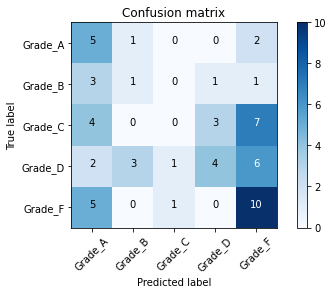

In [ ]:
#Generate Confusion Matrix and plot the same
names = ["Grade_A", "Grade_B", "Grade_C","Grade_D","Grade_F"]
cm_G1 = confusion_matrix(test_Y_G1, predicted_Y_G1,labels=["A", "B", "C","D","F"])
plt.figure()
plot_confusion_matrix(cm_G1, classes=names, title='Confusion matrix')

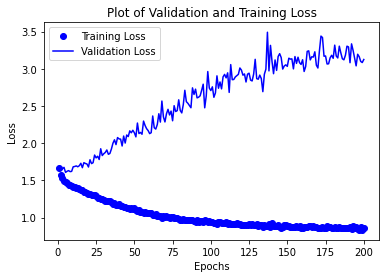

In [ ]:
#Plot training loss and validation loss
loss_G1 = history_G1.history['loss']
val_loss_G1 = history_G1.history['val_loss']
epochs  = range(1,len(loss_G1)+1)
plt.plot(epochs,loss_G1,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss_G1,'b',label = 'Validation Loss')
plt.title('Plot of Validation and Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



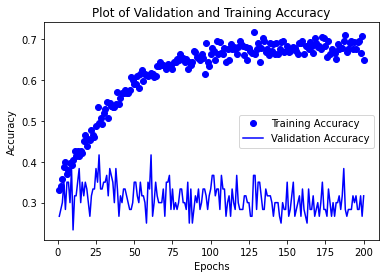

In [ ]:
#Plot training accuracy and validation accuracy
acc_G1 = history_G1.history['accuracy']
val_acc_G1 = history_G1.history['val_accuracy']
plt.plot(epochs,acc_G1,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc_G1,'b',label = 'Validation Accuracy')
plt.title('Plot of Validation and Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_G1.history['accuracy']

[0.33134329319000244,
 0.34029850363731384,
 0.35820895433425903,
 0.38805970549583435,
 0.4000000059604645,
 0.37014925479888916,
 0.37910446524620056,
 0.39701491594314575,
 0.3910447657108307,
 0.4029850661754608,
 0.42686566710472107,
 0.41492536664009094,
 0.42686566710472107,
 0.41492536664009094,
 0.42686566710472107,
 0.420895516872406,
 0.4507462680339813,
 0.4656716287136078,
 0.4388059675693512,
 0.4567164182662964,
 0.45373135805130005,
 0.4776119291782379,
 0.4656716287136078,
 0.4597014784812927,
 0.4865671694278717,
 0.5343283414840698,
 0.4955223798751831,
 0.5074626803398132,
 0.49253731966018677,
 0.5194029808044434,
 0.5283582210540771,
 0.5462686419487,
 0.5074626803398132,
 0.5432835817337036,
 0.5373134613037109,
 0.5343283414840698,
 0.5343283414840698,
 0.5402985215187073,
 0.5701492428779602,
 0.5402985215187073,
 0.5552238821983337,
 0.5671641826629639,
 0.5671641826629639,
 0.5761194229125977,
 0.5671641826629639,
 0.5671641826629639,
 0.5761194229125977,
 0.